# **Vietname Housing Price**

## Step 1: Data Preparation

In [15]:
# Import library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re
import seaborn as sns

### 1.1. Import dataset & Raw Processing

In [16]:
# Truyền đường dẫn
path = "hnRealEstate_RawDataSet.csv"

# Read file csv
df = pd.read_csv(path)

In [17]:
# Dataset shape

num_row, num_col = df.shape
print("Number of rows: ", num_row)
print("Number of columns: ", num_col)

Number of rows:  82497
Number of columns:  13


In [18]:
# Delete the first column because it dont have any function

del df['Unnamed: 0']

In [19]:
# Define data type of columns

df.dtypes

Ngày               object
Địa chỉ            object
Quận               object
Huyện              object
Loại hình nhà ở    object
Giấy tờ pháp lý    object
Số tầng            object
Số phòng ngủ       object
Diện tích          object
Dài                object
Rộng               object
Giá/m2             object
dtype: object

In [20]:
# Nhận thấy Cột huyện đang được hiểu sai => Phải sửa thành Xã/Phường

df.rename(columns={'Huyện': 'Phường'}, inplace=True)

df.head()

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
0,2020-08-05,"Đường Hoàng Quốc Việt, Phường Nghĩa Đô, Quận C...",Quận Cầu Giấy,Phường Nghĩa Đô,"Nhà ngõ, hẻm",Đã có sổ,4,5 phòng,46 m²,NaN,NaN,"86,96 triệu/m²"
1,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,37 m²,NaN,NaN,"116,22 triệu/m²"
2,2020-08-05,"phố minh khai, Phường Minh Khai, Quận Hai Bà T...",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,40 m²,10 m,4 m,65 triệu/m²
3,2020-08-05,"Đường Võng Thị, Phường Thụy Khuê, Quận Tây Hồ,...",Quận Tây Hồ,Phường Thụy Khuê,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,51 m²,12.75 m,4 m,100 triệu/m²
4,2020-08-05,"Đường Kim Giang, Phường Kim Giang, Quận Thanh ...",Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,36 m²,9 m,4 m,"86,11 triệu/m²"


### 1.2. Checking duplicated rows

In [21]:
# Đếm number of rows bị trùng lặp
df_dup = df[df.duplicated(keep=False)]
df_dup.shape

(1504, 12)

In [22]:
# Đếm number of rows bị trùng lặp (sau khi đã loại trừ duplicated)
sum(df.duplicated())

815

In [23]:
# Loại bỏ các rows bị trùng lặp
df=df.drop_duplicates()

# Kiểm tra xem còn duplicated rows ko
sum(df.duplicated())

0

### 1.3. Detecting & Removing missing values

In [24]:
# Kiểm tra tỷ lệ giá trị bị thiếu ở mỗi cột

df.isnull().sum()/len(df)

Ngày               0.000012
Địa chỉ            0.000588
Quận               0.000024
Phường             0.000588
Loại hình nhà ở    0.000392
Giấy tờ pháp lý    0.347959
Số tầng            0.556585
Số phòng ngủ       0.000477
Diện tích          0.000024
Dài                0.758233
Rộng               0.567873
Giá/m2             0.000159
dtype: float64

In [25]:
# Xóa các dòng có nhiều hơn 50% giá trị bị thiếu so với các cột

df.dropna(thresh=df.shape[1] - 5, inplace=True)

#### "Giá/m2"

In [26]:
# Number of Gia/m2 rows missing

df[df["Giá/m2"].isnull()].shape[0]

12

In [27]:
# Xóa các dòng có giá trị bị thiếu

df.dropna(subset=['Giá/m2'], inplace=True)

#### "Quận", "Phường" & "Địa chỉ"

In [28]:
# Tìm ra các dòng có giá trị cột Quận bị missing

df[df["Quận"].isnull()]

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
48418,2020-07-03,"68, Ngọc Hồi, Hà Nội",NaN,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,2 phòng,71 m²,6 m,6 m,43 triệu/m²


In [29]:
# Fill in missing values of row 48418

df.loc[48418, 'Quận'] = 'Thanh Trì'
df.loc[48418, 'Phường'] = 'Ngọc Hồi'


In [30]:
# Tìm ra các dòng có giá trị cột Phường bị missing
df[df["Phường"].isnull()]

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2
324,2020-08-04,"Đường An Dương Vương, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,4 phòng,77 m²,11 m,7 m,"97,4 triệu/m²"
741,2020-08-04,"Cầu Khê Tang, Quận Hà Đông, Hà Nội",Quận Hà Đông,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,36 m²,NaN,NaN,"43,06 triệu/m²"
8584,2020-07-31,NaN,Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²"
29300,2020-07-18,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,4,3 phòng,24 m²,NaN,NaN,"129,17 triệu/m²"
35553,2020-07-14,"Đường Thịnh Hào 3, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",Đã có sổ,NaN,6 phòng,36 m²,NaN,NaN,100 triệu/m²
40906,2020-07-09,"Đường Kim Giang, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà mặt phố, mặt tiền",NaN,NaN,4 phòng,40 m²,NaN,NaN,"82,5 triệu/m²"
46176,2020-07-06,"Đường Cầu Giấy, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,80 triệu/m²
54426,2020-06-29,"Đường Trần Duy Hưng, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,NaN,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,40 m²,NaN,NaN,140 triệu/m²
58641,2020-06-25,"Đường Bùi Xương Trạch, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,31 m²,NaN,NaN,"116,13 triệu/m²"
61781,2020-06-23,"Đường Tôn Thất Tùng, Quận Đống Đa, Hà Nội",Quận Đống Đa,NaN,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,37 m²,NaN,NaN,"110,81 triệu/m²"


In [31]:
# Tạm thời điền các giá trị của cột Phường bằng giá trị của Quận

df['Phường'].fillna(df['Quận'], inplace=True)

In [32]:
# Tạo ra một cột Thành phố (Hà Nội)

df['Thành phố'] = 'Hà Nội'

In [33]:
# Kiểm tra các missing values cột Địa chỉ

df[df["Địa chỉ"].isnull()]

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Thành phố
3397,2020-08-03,NaN,Quận Thanh Xuân,Phường Thượng Đình,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,40 m²,NaN,NaN,"68,75 triệu/m²",Hà Nội
8584,2020-07-31,NaN,Quận Thanh Xuân,Quận Thanh Xuân,"Nhà ngõ, hẻm",Đã có sổ,5,4 phòng,33 m²,NaN,4.1 m,"90,91 triệu/m²",Hà Nội
8926,2020-07-31,NaN,Quận Hoàng Mai,Phường Lĩnh Nam,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,30 m²,NaN,NaN,70 triệu/m²,Hà Nội
9101,2020-07-31,NaN,Quận Bắc Từ Liêm,Phường Thụy Phương,"Nhà ngõ, hẻm",NaN,NaN,2 phòng,40 m²,NaN,NaN,20 triệu/m²,Hà Nội
9105,2020-07-31,NaN,Quận Thanh Xuân,Phường Kim Giang,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,50 m²,NaN,NaN,68 triệu/m²,Hà Nội
11029,2020-07-30,NaN,Quận Hoàng Mai,Phường Vĩnh Hưng,"Nhà ngõ, hẻm",NaN,NaN,2 phòng,20 m²,NaN,NaN,65 triệu/m²,Hà Nội
11677,2020-07-29,NaN,Quận Hà Đông,Phường Văn Quán,"Nhà ngõ, hẻm",NaN,NaN,4 phòng,35 m²,NaN,NaN,"81,43 triệu/m²",Hà Nội
15369,2020-07-27,NaN,Quận Cầu Giấy,Phường Trung Hoà,Nhà phố liền kề,NaN,NaN,3 phòng,35 m²,NaN,NaN,1 đ/m²,Hà Nội
17349,2020-07-26,NaN,Quận Hoàng Mai,Phường Thịnh Liệt,"Nhà mặt phố, mặt tiền",NaN,NaN,3 phòng,40 m²,NaN,NaN,65 triệu/m²,Hà Nội
26003,2020-07-20,NaN,Quận Hà Đông,Phường La Khê,"Nhà ngõ, hẻm",NaN,NaN,3 phòng,35 m²,NaN,NaN,28 đ/m²,Hà Nội


In [34]:
# Điền vào các cột missing values Địa chỉ = "Phường; Quận; Thành phố"

def fill_missing_address(row):
    phuong = row['Phường']
    quan = row['Quận']
    thanh_pho = row['Thành phố']
    
    if pd.notnull(phuong) and pd.notnull(quan):
        return phuong + ', ' + quan + ', ' + thanh_pho
    elif pd.notnull(phuong):
        return phuong + ', ' + thanh_pho
    elif pd.notnull(quan):
        return quan + ', ' + thanh_pho
    else:
        return thanh_pho


df['Địa chỉ'] = df.apply(fill_missing_address, axis=1)

#### "Loại hình nhà ở"

In [35]:
# Kiểm tra missing values cột Loại hình nhà ở

df[df["Loại hình nhà ở"].isnull()]

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Thành phố
19888,2020-07-24,"Phường Phúc La, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Phúc La,NaN,Đã có sổ,NaN,4 phòng,50 m²,NaN,NaN,136 triệu/m²,Hà Nội
23415,2020-07-22,"Phường Xuân La, Quận Tây Hồ, Hà Nội",Quận Tây Hồ,Phường Xuân La,NaN,Đã có sổ,NaN,NaN,33 m²,9 m,3.6 m,"93,94 triệu/m²",Hà Nội
26557,2020-07-20,"Phường Láng Hạ, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Láng Hạ,NaN,Đã có sổ,NaN,NaN,71 m²,NaN,NaN,"185,92 triệu/m²",Hà Nội
26908,2020-07-20,"Phường Đại Mỗ, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Đại Mỗ,NaN,Đang chờ sổ,NaN,1 phòng,45 m²,NaN,NaN,488.888 đ/m²,Hà Nội
27058,2020-07-20,"Phường Ô Chợ Dừa, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Ô Chợ Dừa,NaN,Đã có sổ,NaN,NaN,47 m²,NaN,NaN,"276,6 triệu/m²",Hà Nội
29870,2020-07-17,"Phường Ô Chợ Dừa, Quận Đống Đa, Hà Nội",Quận Đống Đa,Phường Ô Chợ Dừa,NaN,Đã có sổ,NaN,NaN,70 m²,NaN,NaN,"428,57 triệu/m²",Hà Nội
34667,2020-07-14,"Phường Hà Cầu, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Hà Cầu,NaN,NaN,NaN,3 phòng,36 m²,NaN,NaN,"76,39 triệu/m²",Hà Nội
34996,2020-07-14,"Phường La Khê, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường La Khê,NaN,NaN,NaN,4 phòng,50 m²,NaN,NaN,"87,6 triệu/m²",Hà Nội
47742,2020-07-04,"Phường Mỹ Đình 2, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Mỹ Đình 2,NaN,NaN,NaN,2 phòng,40 m²,NaN,NaN,"66,25 triệu/m²",Hà Nội
51997,2020-07-01,"Xã Cổ Đông, Thị xã Sơn Tây, Hà Nội",Thị xã Sơn Tây,Xã Cổ Đông,NaN,Đang chờ sổ,NaN,NaN,117 m²,24 m,5 m,"13,68 triệu/m²",Hà Nội


In [36]:
# Bổ sung vào cột Loại hình nhà ở bị thiếu giá trị "Không rõ"

df["Loại hình nhà ở"].fillna("Không rõ", inplace=True)


#### "Giấy tờ pháp lý"

In [37]:
# Kiểm tra missing values cột Giấy tờ
df[df["Giấy tờ pháp lý"].isnull()]

# Bổ sung vào cột Giấy tờ pháp lý bị thiếu giá trị "Không rõ"
df["Giấy tờ pháp lý"].fillna("Không rõ", inplace=True)


#### "Số tầng"

In [38]:
# Kiểm tra missing values cột Số tầng
df[df["Số tầng"].isnull()]

# Bổ sung vào cột Giấy tờ pháp lý bị thiếu giá trị "Không rõ"

df["Số tầng"].fillna('1', inplace=True)

#### "Số phòng ngủ"

In [39]:
# Kiểm tra missing values cột Số tầng
df[df["Số phòng ngủ"].isnull()]

# Bổ sung vào cột Số phòng ngủ với giá trị 1
df['Số phòng ngủ'].fillna("1 phòng", inplace=True)


#### "Diện tích"

In [40]:
# Kiểm tra missing values cột Số tầng
df[df["Diện tích"].isnull()]

# => Không có cột nào bị thiếu

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Dài,Rộng,Giá/m2,Thành phố


In [41]:
# Kiểm tra tỷ lệ giá trị bị thiếu ở mỗi cột
df.isnull().sum()/len(df)

Ngày               0.000000
Địa chỉ            0.000000
Quận               0.000000
Phường             0.000000
Loại hình nhà ở    0.000000
Giấy tờ pháp lý    0.000000
Số tầng            0.000000
Số phòng ngủ       0.000000
Diện tích          0.000000
Dài                0.758158
Rộng               0.567724
Giá/m2             0.000000
Thành phố          0.000000
dtype: float64

#### *Nhận thấy tỉ lệ missing values của 2 cột Dài (75%) và cột Rộng (56%) là vô cùng lớn => Không có cơ sở nào để đánh giá hai cột này => Loại bỏ 2 columns này khỏi dataset do không đem lại insight gì quan trọng*

In [42]:
# Xóa bỏ 2 cột Dài, Rộng
df=df.drop(columns=["Dài","Rộng"])

### 1.4. Casting Data Type

#### "Ngày"

In [43]:
# Casting Ngày to datetime
df['Ngày'] = pd.to_datetime(df['Ngày'])

#### "Số tầng"

In [44]:
# Kiểm tra giá trị Cột Số tầng
df['Số tầng'].unique()

array(['4', '1', '6', '5', '7', '2', '3', '8', '9', '50', '38', '35',
       '10', 'Nhiều hơn 10', '45', '33', '42', '25', '73', '12', '65',
       '55', '30', '14', '40', '52', '54', '32', '29'], dtype=object)

In [45]:
# Từ output trên ta có thể thấy có một giá trị Nhiều hơn 10 không thể cast sang int => Chuyển về 11
df.loc[df['Số tầng']=='Nhiều hơn 10','Số tầng']=11

In [46]:
# Chuyền về dạng int
df['Số tầng'] = df['Số tầng'].astype(int)

#### "Số phòng ngủ"

In [47]:
# SỐ PHÒNG NGỦ

# Kiểm tra tổng quan dữ liệu
df["Số phòng ngủ"].unique()

array(['5 phòng', '3 phòng', '4 phòng', '6 phòng', 'nhiều hơn 10 phòng',
       '8 phòng', '2 phòng', '7 phòng', '9 phòng', '1 phòng', '10 phòng'],
      dtype=object)

In [48]:
# Xóa bỏ ký tự phòng trong cột số phòng
df["Số phòng ngủ"]=df["Số phòng ngủ"].str.replace(' phòng', '')

In [49]:
# Chuyển nhiều hơn 10 thành 11 phòng
df.loc[df["Số phòng ngủ"]=='nhiều hơn 10','Số phòng ngủ']='11'

In [50]:
# Chuyển về dạng int
df['Số phòng ngủ'] = df['Số phòng ngủ'].astype(int)

#### "Diện tích"

In [51]:
# DIỆN TÍCH

# Kiểm tra tổng quan các giá trị
df["Diện tích"].unique()

array(['46 m²', '37 m²', '40 m²', '51 m²', '36 m²', '52 m²', '32 m²',
       '75 m²', '41 m²', '35 m²', '30 m²', '50 m²', '52.8 m²', '165 m²',
       '70 m²', '34 m²', '65 m²', '45 m²', '79 m²', '90 m²', '73 m²',
       '18 m²', '42 m²', '43 m²', '25 m²', '38 m²', '49 m²', '33 m²',
       '120 m²', '200 m²', '47 m²', '55 m²', '77 m²', '27 m²', '60 m²',
       '81 m²', '20 m²', '54 m²', '28 m²', '113 m²', '76 m²', '62 m²',
       '11 m²', '44 m²', '21 m²', '58 m²', '196 m²', '48 m²', '24 m²',
       '56 m²', '104 m²', '83 m²', '68 m²', '31 m²', '64 m²', '32.1 m²',
       '185 m²', '61 m²', '23 m²', '92 m²', '85 m²', '30.2 m²', '26 m²',
       '140 m²', '31.5 m²', '63 m²', '39 m²', '80 m²', '57 m²', '16 m²',
       '13 m²', '67 m²', '35.22 m²', '110 m²', '35.21 m²', '138 m²',
       '3 m²', '40.22 m²', '22 m²', '32.22 m²', '82 m²', '53 m²', '86 m²',
       '47.3 m²', '33.33 m²', '87 m²', '96 m²', '66 m²', '451 m²',
       '108 m²', '32.07 m²', '125 m²', '33.1 m²', '39.8 m²', '36.5 m²',
 

In [52]:
# Cắt bỏ ký tự m2
df['Diện tích']=df['Diện tích'].str.replace(' m²', '')

In [53]:
df['Diện tích'] = df['Diện tích'].astype('float')

df['Diện tích'].dtypes

dtype('float64')

### 1.5. Removing Outlier

#### "Diện tích"

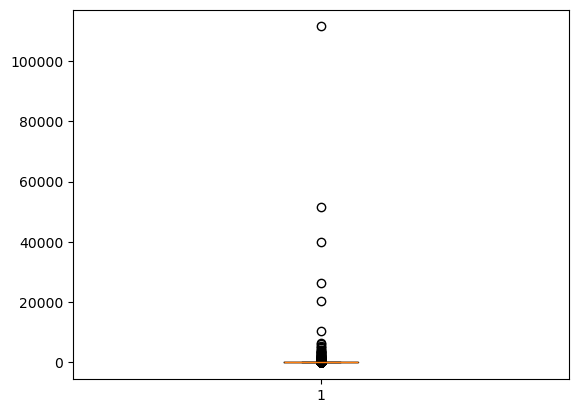

In [54]:
plt.boxplot(df["Diện tích"])
plt.show()

Có thể thấy dữ liệu về Diện tích đang bị phân tán vô cùng lớn, cần loại bỏ các Outlier trong Dataset

In [55]:
df[df['Diện tích'] <= df['Diện tích'].quantile(0.0005)]

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Thành phố
527,2020-08-04,"Phường Mộ Lao, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Mộ Lao,"Nhà ngõ, hẻm",Đã có sổ,1,3,3.00,810 triệu/m²,Hà Nội
2939,2020-08-03,"Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,1,5,3.99,"1,316666666 tỷ/m²",Hà Nội
3597,2020-08-03,"Phường Quan Hoa, Quận Cầu Giấy, Hà Nội",Quận Cầu Giấy,Phường Quan Hoa,"Nhà ngõ, hẻm",Đã có sổ,1,3,3.00,"1,2 tỷ/m²",Hà Nội
4506,2020-08-03,"Phường Trương Định, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Trương Định,"Nhà mặt phố, mặt tiền",Không rõ,1,3,1.00,"2,2 tỷ/m²",Hà Nội
4562,2020-08-03,"Phường Bạch Mai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Bạch Mai,"Nhà mặt phố, mặt tiền",Đã có sổ,1,2,1.00,"2,28 tỷ/m²",Hà Nội
4818,2020-08-02,"Phường Nhân Chính, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,1,4,3.00,"1,166666666 tỷ/m²",Hà Nội
9487,2020-07-31,"Phường Long Biên, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Long Biên,"Nhà ngõ, hẻm",Đã có sổ,1,4,2.00,"2,65 tỷ/m²",Hà Nội
10961,2020-07-30,"Phường Phú Đô, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Phú Đô,"Nhà mặt phố, mặt tiền",Đã có sổ,1,3,3.00,850 triệu/m²,Hà Nội
13121,2020-07-29,"Phường Mỹ Đình 1, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Mỹ Đình 1,"Nhà ngõ, hẻm",Không rõ,1,4,4.00,"812,5 triệu/m²",Hà Nội
16569,2020-07-27,"Phường Cầu Diễn, Quận Nam Từ Liêm, Hà Nội",Quận Nam Từ Liêm,Phường Cầu Diễn,"Nhà ngõ, hẻm",Không rõ,1,4,4.00,"912,5 triệu/m²",Hà Nội


In [56]:
df[df['Diện tích'] >= df['Diện tích'].quantile(0.9998)]

,Ngày,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá/m2,Thành phố
1574,2020-08-04,"Phường Khương Đình, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Khương Đình,"Nhà ngõ, hẻm",Đã có sổ,1,5,3659.0,997.540 đ/m²,Hà Nội
1583,2020-08-04,"Phường Nhân Chính, Quận Thanh Xuân, Hà Nội",Quận Thanh Xuân,Phường Nhân Chính,"Nhà ngõ, hẻm",Đã có sổ,1,4,6459.0,410.280 đ/m²,Hà Nội
1659,2020-08-04,"Phường Đại Kim, Quận Hoàng Mai, Hà Nội",Quận Hoàng Mai,Phường Đại Kim,"Nhà ngõ, hẻm",Đã có sổ,1,3,20430.0,69.505 đ/m²,Hà Nội
5147,2020-08-02,"Phường Minh Khai, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Minh Khai,"Nhà ngõ, hẻm",Đã có sổ,1,5,4141.0,917.652 đ/m²,Hà Nội
15202,2020-07-27,"Phường Phú La, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Phú La,"Nhà ngõ, hẻm",Đã có sổ,2,3,26400.0,62.500 đ/m²,Hà Nội
17460,2020-07-26,"Phường Ngọc Thụy, Quận Long Biên, Hà Nội",Quận Long Biên,Phường Ngọc Thụy,"Nhà ngõ, hẻm",Đã có sổ,4,3,111411.0,34 đ/m²,Hà Nội
24872,2020-07-21,"Phường Thanh Lương, Quận Hai Bà Trưng, Hà Nội",Quận Hai Bà Trưng,Phường Thanh Lương,Nhà phố liền kề,Đã có sổ,5,3,40000.0,157.500 đ/m²,Hà Nội
37236,2020-07-13,"Phường Nguyễn Trãi, Quận Hà Đông, Hà Nội",Quận Hà Đông,Phường Nguyễn Trãi,"Nhà ngõ, hẻm",Đã có sổ,1,4,4848.0,577.557 đ/m²,Hà Nội
38704,2020-07-11,"Xã Vân Hòa, Huyện Ba Vì, Hà Nội",Huyện Ba Vì,Xã Vân Hòa,"Nhà mặt phố, mặt tiền",Không rõ,1,2,3600.0,"1,39 triệu/m²",Hà Nội
53637,2020-06-29,"Xã Tân Triều, Huyện Thanh Trì, Hà Nội",Huyện Thanh Trì,Xã Tân Triều,Nhà phố liền kề,Đã có sổ,3,5,5625.0,746.666 đ/m²,Hà Nội


Dựa vào mối liên hệ giữa Giá và Diện tích, ta có thể thấy các dòng giá trị trên là hoàn toàn vô lý, không thực tế => Cần loại bỏ các giá trị Outlier này

In [57]:
min_=df['Diện tích'].quantile(0.0005)
max_=df['Diện tích'].quantile(0.9998)

df=df[df['Diện tích'] >= min_]
df=df[df['Diện tích'] <= max_]

#### "Giá/m2"

In [58]:
df['Đơn vị'] = df['Giá/m2'].apply(lambda x: re.findall(r'[^\d.,]+', x)[0])
df['Đơn vị'].unique()

array([' triệu/m²', ' đ/m²', ' tỷ/m²'], dtype=object)

* Cột 'Giá/m2' hiện tại đang sử dụng 3 loại đơn vị đo khác nhau: triệu/m2, đ/m2, tỷ/m2
=> Chuyển về cùng một loại đơn vị triệu/m2

In [59]:
df['Giá/m2']=df['Giá/m2'].str.replace('.', '')
df['Giá/m2']=df['Giá/m2'].str.replace(' ', '')
df['Giá/m2']=df['Giá/m2'].str.replace(',', '.')

In [60]:
# Xóa bỏ các giá trị đơn vị của Giá/m2
df['Giá/m2'] = df['Giá/m2'].str.replace('đ/m²', '').str.replace('triệu/m²', '').str.replace('tỷ/m²', '')

# Chuyển về float
df["Giá/m2"]=df["Giá/m2"].astype(float)

# Check
df['Giá/m2'].dtypes


dtype('float64')

Chuyển đổi các giá trị về đúng đơn vị triệu đồng/m2

In [61]:
def convert_price(row):
    if row['Đơn vị'] == ' tỷ/m²':
        return row['Giá/m2'] * 1000
    elif row['Đơn vị'] == ' đ/m²':
        return row['Giá/m2'] * 0.000001
    else:
        return row['Giá/m2']

df['Giá/m2'] = df.apply(convert_price, axis=1)

df=df.drop(columns="Đơn vị")
df = df.rename(columns={'Giá/m2': 'Giá (triệu đồng/m2)'})

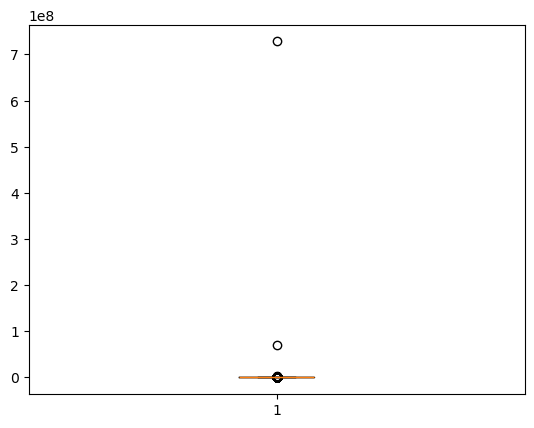

In [62]:
plt.boxplot(df["Giá (triệu đồng/m2)"])
plt.show()

Có khá nhiều outlier => Cần loại bỏ bớt các giá trị này

In [63]:
threshold_upto = df["Giá (triệu đồng/m2)"].quantile(0.9995)
threshold_downto = df["Giá (triệu đồng/m2)"].quantile(0.0005)

df=df[df["Giá (triệu đồng/m2)"] <= threshold_upto]
df=df[df["Giá (triệu đồng/m2)"] >= threshold_downto]

In [64]:
df['Lower Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.25) - 1.5 * (x.quantile(0.75) - x.quantile(0.25)))
df['Upper Bound'] = df.groupby(['Quận'])['Giá (triệu đồng/m2)'].transform(lambda x: x.quantile(0.75) + 1.5 * (x.quantile(0.75) - x.quantile(0.25)))

df = df[(df['Giá (triệu đồng/m2)'] >= df['Lower Bound']) & (df['Giá (triệu đồng/m2)'] <= df['Upper Bound'])]
df = df.drop(['Lower Bound', 'Upper Bound'], axis=1)

In [65]:
df.dtypes

Ngày                   datetime64[ns]
Địa chỉ                        object
Quận                           object
Phường                         object
Loại hình nhà ở                object
Giấy tờ pháp lý                object
Số tầng                         int32
Số phòng ngủ                    int32
Diện tích                     float64
Giá (triệu đồng/m2)           float64
Thành phố                      object
dtype: object

In [66]:
sum(df.duplicated())

df=df.drop_duplicates()


In [67]:
# Tạo ra dataframe mới (Không có cột Ngày) -> drop duplicate

df1=df.drop(columns="Ngày").drop_duplicates(keep='first')

In [68]:
# Add lại giá trị ngày vào dataframe này
df1["Ngày"]=df.loc[df1.index]["Ngày"]

In [69]:
df1[df1['Ngày'].isnull()]

,Địa chỉ,Quận,Phường,Loại hình nhà ở,Giấy tờ pháp lý,Số tầng,Số phòng ngủ,Diện tích,Giá (triệu đồng/m2),Thành phố,Ngày


##### Add new column Quan_Viz in order to vizulization in PowerBI

In [70]:
df1['Quan_BI'] = df1['Quận']

In [71]:
# Loại bỏ các giá trị Quận, Huyện, Thị xã,...
df1['Quận'] = df1['Quận'].str.replace('Thị xã ', '').str.replace('Huyện ', '').str.replace('Quận ', '')

In [72]:
# Gộp các dòng ở Nam Từ Liêm và Bắc Từ Liêm vào cùng 1 Quận Từ Liêm (Dữ liệu Map của PowerBI không có dữ liệu về 2 quận)
df1['Quận'] = df1['Quận'].str.replace('Nam Từ Liêm', 'Từ Liêm').str.replace('Bắc Từ Liêm', 'Từ Liêm')

#### **Convert the DataFrame df1 to .csv file**

In [73]:
df1.to_csv('processData.csv')

## Step 2: Data Visualization

In [74]:
avg_price_Quận = df1.groupby(['Quận']).mean(numeric_only=True)['Giá (triệu đồng/m2)']

avg_price_Quận = avg_price_Quận.sort_values()

house_num_Quận = df1.groupby(['Quận']).count()['Địa chỉ'].sort_values()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21092\1020857297.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(avg_price_Quận.index,rotation = 90),


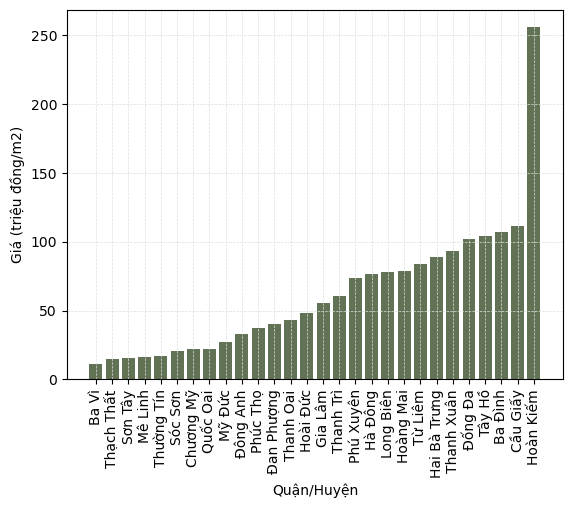

In [75]:
x = avg_price_Quận.index
y1 = avg_price_Quận.values

fig, ax1 = plt.subplots()

ax1.bar(x, y1, color = '#627254');

ax1.set_xticklabels(avg_price_Quận.index,rotation = 90),
ax1.set_xlabel('Quận/Huyện');
ax1.set_ylabel('Giá (triệu đồng/m2)');
ax1.grid(axis = 'x')
ax1.grid(color = '#DDDDDD', linestyle = 'dashed', linewidth = 0.5)

In [76]:
avg_price_Quận_timeseries = df1.groupby(['Quận', 'Ngày']).mean(numeric_only=True)['Giá (triệu đồng/m2)']

avg_price_Quận_timeseries.to_frame()

Giá (triệu đồng/m2)
Quận    Ngày                           
Ba Vì   2020-06-08            20.000000
        2020-06-26             5.910000
        2020-07-25             7.350000
Ba Đình 2019-12-30           111.110000
        2020-02-14            42.500000
...                                 ...
Đống Đa 2020-08-01           102.015000
        2020-08-02            99.665357
        2020-08-03            99.680039
        2020-08-04            95.467995
        2020-08-05           112.500000

[1289 rows x 1 columns]

In [79]:
num_House_sold = df1.groupby(['Quận']).count()['Địa chỉ'].sort_values()

num_House_sold

Quận
Phú Xuyên           1
Mỹ Đức              1
Phúc Thọ            2
Ba Vì               3
Mê Linh            10
Thạch Thất         12
Thường Tín         13
Chương Mỹ          18
Sơn Tây            19
Quốc Oai           21
Đan Phượng         21
Sóc Sơn            38
Thanh Oai          42
Đông Anh           88
Gia Lâm           250
Hoài Đức          394
Hoàn Kiếm         495
Thanh Trì        1094
Tây Hồ           2479
Long Biên        3661
Ba Đình          3818
Từ Liêm          3920
Cầu Giấy         5504
Hà Đông          6732
Hai Bà Trưng     8113
Hoàng Mai        9189
Thanh Xuân      10047
Đống Đa         10989
Name: Địa chỉ, dtype: int64